In [1]:
from tf.app import use
color = {1: "#47edff", 2: "#81ee93", 3: "#eaff47", 4: "#ffcb47", 5: "#ffa647", 6: "#ff7b47", 7: "#ff479d", 8: "#ff4747", 9: "#477eff", 10: "#a647ff"}

In [2]:
N1904 = use("CenterBLC/N1904", version="1.0.0", hoist=globals())

**Locating corpus resources ...**

Name,# of nodes,# slots / node,% coverage
book,27,5102.93,100
chapter,260,529.92,100
verse,7944,17.34,100
sentence,8011,17.20,100
group,8945,7.01,46
clause,42506,8.36,258
wg,106868,6.88,533
phrase,69007,1.90,95
subphrase,116178,1.60,135
word,137779,1.00,100


Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

See [here](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/viewtypes.md#start) for more information on viewtypes

Examples based on:\
https://github.com/oliverglanz/Text-Fabric/blob/master/Colloquium-BibleSoftware/GSEM505_Colloquium_ExegeticalUseOfBibleSoftware.ipynb

# Syntatic use of the expression "Jesus Christ" and "Christ Jesus" in the NT

## Shortcut approach

In [89]:
F.function.freqList(nodeTypes='phrase')[0]

('Pred', 24767)

In [100]:
for function_value in F.function.freqList(nodeTypes='phrase'):
    print(function_value[0])
    results = N1904.search(f"""
phrase function={str(function_value[0])}
    w1:word lemmatranslit=Iesous
    w2:word lemmatranslit=Khristos

w1 <: w2
""")
    #N1904.table(results, end=1, condensed=False, colorMap=color, multiFeatures=False, queryFeatures=False, withNodes=False, extraFeatures='trans', hiddenTypes={'wg', 'subphrase', 'group'})

Pred
  0.35s 0 results
Cmpl
  0.35s 80 results
Subj
  0.34s 39 results
Objc
  0.34s 21 results
PreC
  0.34s 8 results
Adv
  0.34s 0 results


In [110]:
for function_value in F.function.freqList(nodeTypes='phrase'):
    print(function_value[0])
    results = N1904.search(f"""
phrase function={str(function_value[0])}
    w1:word lemmatranslit=Iesous
    w2:word lemmatranslit=Khristos

w1 :> w2
""")
    #N1904.table(results, end=1, condensed=False, colorMap=color, multiFeatures=False, queryFeatures=False, withNodes=False, extraFeatures='trans', hiddenTypes={'wg', 'subphrase', 'group'})

Pred
  0.35s 0 results
Cmpl
  0.35s 67 results
Subj
  0.35s 19 results
Objc
  0.35s 15 results
PreC
  0.35s 9 results
Adv
  0.35s 0 results


## Syntactical uses of "Jesus Christ"

In [41]:
results = N1904.search("""
phrase function*
    w1:word lemmatranslit=Iesous
    w2:word lemmatranslit=Khristos

w1 <: w2

""")
N1904.table(results)

  0.36s 148 results


In [16]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='jesuschrist.tsv')

In [18]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/jesuschrist.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,function1,NODE2,TYPE2,TEXT2,lemmatranslit2,NODE3,TYPE3,TEXT3,lemmatranslit3
0,1,Matthew,1,1,189518,phrase,Βίβλος γενέσεως Ἰησοῦ Χριστοῦ υἱοῦ Δαυεὶδ υἱοῦ...,PreC,3,word,Ἰησοῦ,Iesous,4,word,Χριστοῦ,Khristos
1,2,Matthew,1,18,189653,phrase,Τοῦ Ἰησοῦ Χριστοῦ ἡ γένεσις,Subj,278,word,Ἰησοῦ,Iesous,279,word,Χριστοῦ,Khristos


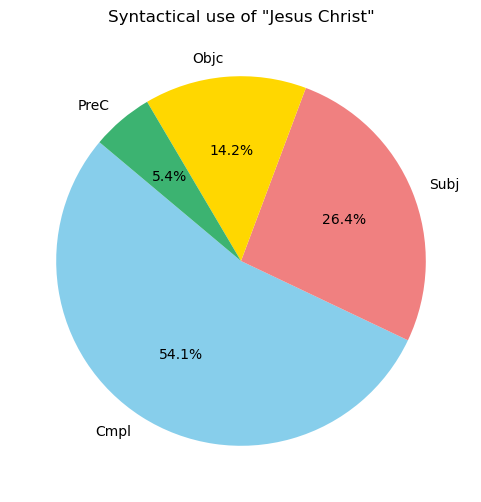

In [30]:
df = pd.DataFrame(NTresults['function1']) # Creating Pandas DataFrame

book_counts = df["function1"].value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts, labels=book_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold", "mediumseagreen"])
plt.title("Syntactical use of \"Jesus Christ\"")
plt.show() # Plot pie chart

## Syntactical uses of "Christ Jesus"

In [37]:
results = N1904.search("""
phrase function*
    w1:word lemmatranslit=Iesous
    w2:word lemmatranslit=Khristos

w1 :> w2

""")
N1904.table(results)

  0.35s 110 results


In [33]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='christjesus.tsv')

In [34]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/christjesus.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,function1,NODE2,TYPE2,TEXT2,lemmatranslit2,NODE3,TYPE3,TEXT3,lemmatranslit3
0,1,Acts,24,24,231998,phrase,περὶ τῆς εἰς Χριστὸν Ἰησοῦν πίστεως.,Cmpl,80532,word,Ἰησοῦν,Iesous,80531,word,Χριστὸν,Khristos
1,2,Romans,1,1,233352,phrase,"Παῦλος δοῦλος Χριστοῦ Ἰησοῦ, κλητὸς ἀπόστολος ...",Subj,83072,word,"Ἰησοῦ,",Iesous,83071,word,Χριστοῦ,Khristos


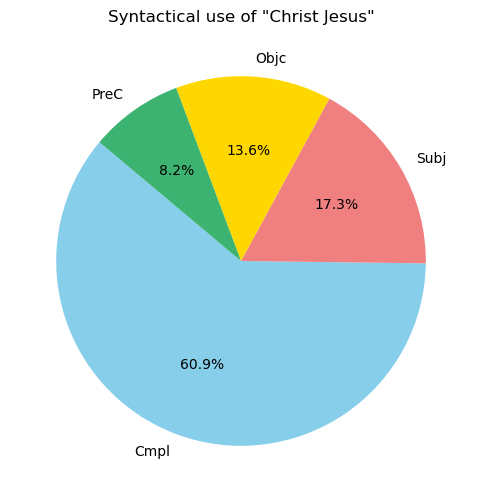

In [35]:
df = pd.DataFrame(NTresults['function1']) # Creating Pandas DataFrame

book_counts = df["function1"].value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts, labels=book_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold", "mediumseagreen"])
plt.title("Syntactical use of \"Christ Jesus\"")
plt.show() # Plot pie chart

# Word study of σπλαγχνίζομαι

In [3]:
results = N1904.search("""
word lemma=σπλαγχνίζομαι person* number* tense* mood* voice*
""")
N1904.table(results)

  0.17s 12 results


n,p,verse,word
1,Matthew 9:36,,ἐσπλαγχνίσθη
2,Matthew 14:14,,ἐσπλαγχνίσθη
3,Matthew 15:32,,Σπλαγχνίζομαι
4,Matthew 18:27,,σπλαγχνισθεὶς
5,Matthew 20:34,,σπλαγχνισθεὶς
6,Mark 1:41,,σπλαγχνισθεὶς
7,Mark 6:34,,ἐσπλαγχνίσθη
8,Mark 8:2,,Σπλαγχνίζομαι
9,Mark 9:22,,σπλαγχνισθεὶς
10,Luke 7:13,,ἐσπλαγχνίσθη


In [153]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='wordstudy.tsv')

In [5]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

In [13]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/wordstudy.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,lemma1,mood1,number1,person1,tense1,voice1
0,1,Matthew,9,36,4826,word,ἐσπλαγχνίσθη,σπλαγχνίζομαι,indicative,singular,p3,aorist,passive
1,2,Matthew,14,14,8257,word,ἐσπλαγχνίσθη,σπλαγχνίζομαι,indicative,singular,p3,aorist,passive


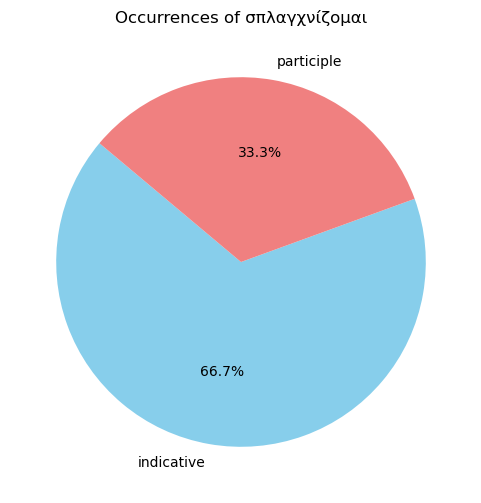

In [12]:
df = pd.DataFrame(NTresults['mood1']) # Creating Pandas DataFrame

book_counts = df["mood1"].value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts, labels=book_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold"])
plt.title("Occurrences of σπλαγχνίζομαι")
plt.show() # Plot pie chart

# Jesus as subject

In [127]:
N1904.viewtype('syntax')

Display is setup for viewtype [syntax-view](https://github.com/saulocantanhede/tfgreek2/blob/main/docs/syntax-view.md#start)

In [159]:
results = N1904.search("""
c1:clause
    p1:phrase function=Subj
        w1:word lemma=Ἰησοῦς
    p2:phrase function=Pred
        w2:word ln*
    p3:phrase function=Objc
    
c1 <parent- p1
c1 <parent- p2
c1 <parent- p3
""")
N1904.show(results, end=1, condensed=True, condenseType='clause')

  0.75s 76 results


In [85]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='subject.tsv')

In [119]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

In [86]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/subject.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(2)

,R,S1,S2,S3,NODE1,TYPE1,TEXT1,NODE2,TYPE2,TEXT2,...,TEXT4,function4,NODE5,TYPE5,TEXT5,ln5,NODE6,TYPE6,TEXT6,function6
0,1,Matthew,7,28,139149,clause,"ἐτέλεσεν ὁ Ἰησοῦς τοὺς λόγους τούτους,",191322,phrase,ὁ Ἰησοῦς,...,ἐτέλεσεν,Pred,3613,word,ἐτέλεσεν,68.22,191323,phrase,"τοὺς λόγους τούτους,",Objc
1,2,Matthew,9,9,139420,clause,παράγων ὁ Ἰησοῦς ἐκεῖθεν εἶδεν ἄνθρωπον καθήμε...,191713,phrase,ὁ Ἰησοῦς,...,εἶδεν,Pred,4353,word,εἶδεν,24.10,191716,phrase,"ἄνθρωπον καθήμενον ἐπὶ τὸ τελώνιον, Μαθθαῖον λ...",Objc


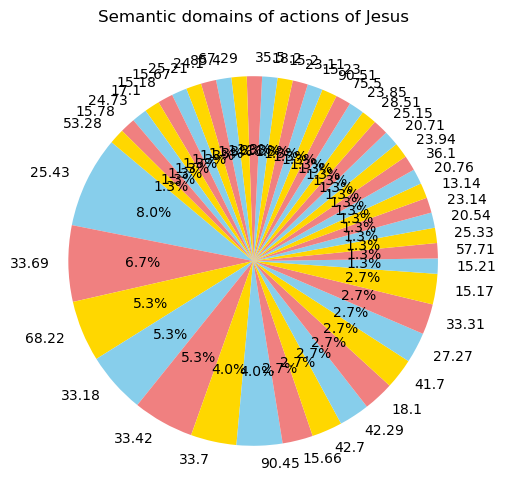

In [153]:
df = pd.DataFrame(NTresults['ln5']).dropna().reset_index(drop=True) # Creating Pandas DataFrame

book_counts = df["ln5"].round(2).value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts, labels=book_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold"])
plt.title("Semantic domains of actions of Jesus")
plt.show() # Plot pie chart

In [154]:
book_counts

ln5
25.43    6
33.69    5
68.22    4
33.18    4
33.42    4
33.70    3
90.45    3
15.66    2
42.70    2
42.29    2
18.10    2
41.70    2
27.27    2
33.31    2
15.17    2
15.21    1
57.71    1
25.33    1
20.54    1
23.14    1
13.14    1
20.76    1
36.10    1
23.94    1
20.71    1
25.15    1
28.51    1
23.85    1
75.50    1
90.51    1
15.23    1
23.11    1
15.20    1
18.20    1
35.50    1
67.29    1
85.40    1
24.10    1
25.21    1
15.67    1
15.18    1
17.10    1
24.73    1
15.78    1
53.28    1
Name: count, dtype: int64

Most frequent semantic domain in predicates is representing “attitudes and emotions,” by the occurences of the verb ἀγαπάω (25.43), while expressing “love, affection, compassion.”\
https://www.laparola.net/greco/louwnida.php?sezmag=25&sez1=43&sez2=43

# Theology of verb κτίζω

In [116]:
results = N1904.search("""
c1:clause
    p1:phrase function=Subj
    p2:phrase function=Pred lemma=κτίζω

c1 <parent- p1
c1 <parent- p2
""")
N1904.table(results, colorMap={2: 'red'}, condensed=False, condenseType='clause')

  0.18s 7 results


n,p,clause,phrase,phrase
1,Mark 13:19,ἣν ἔκτισεν ὁ Θεὸς,ὁ Θεὸς,ἔκτισεν
2,I_Corinthians 11:9,"ἐκτίσθη ἀνὴρ διὰ τὴν γυναῖκα,",ἀνὴρ,ἐκτίσθη
3,Colossians 1:16,"ἐν αὐτῷ ἐκτίσθη τὰ πάντα ἐν τοῖς οὐρανοῖς καὶ ἐπὶ τῆς γῆς, τὰ ὁρατὰ καὶ τὰ ἀόρατα, εἴτε θρόνοι εἴτε κυριότητες εἴτε ἀρχαὶ εἴτε ἐξουσίαι·","τὰ πάντα ἐν τοῖς οὐρανοῖς καὶ ἐπὶ τῆς γῆς, τὰ ὁρατὰ καὶ τὰ ἀόρατα, εἴτε θρόνοι εἴτε κυριότητες εἴτε ἀρχαὶ εἴτε ἐξουσίαι·",ἐκτίσθη
4,Colossians 1:16,τὰ πάντα δι’ αὐτοῦ καὶ εἰς αὐτὸν ἔκτισται·,τὰ πάντα,ἔκτισται·
5,I_Timothy 4:3,ἃ ὁ Θεὸς ἔκτισεν εἰς μετάλημψιν μετὰ εὐχαριστίας τοῖς πιστοῖς καὶ ἐπεγνωκόσι τὴν ἀλήθειαν.,ὁ Θεὸς,ἔκτισεν
6,Revelation 4:11,"σὺ ἔκτισας τὰ πάντα,",σὺ,ἔκτισας
7,Revelation 10:6,"ὃς ἔκτισεν τὸν οὐρανὸν καὶ τὰ ἐν αὐτῷ καὶ τὴν γῆν καὶ τὰ ἐν αὐτῇ καὶ τὴν θάλασσαν καὶ τὰ ἐν αὐτῇ,",ὃς,ἔκτισεν


In [120]:
results = N1904.search("""
c1:clause
    p1:phrase function=Objc
    p2:phrase function=Pred lemma=κτίζω

c1 <parent- p1
c1 <parent- p2
""")
N1904.table(results, colorMap={2: 'blue'}, condenseType='clause')

  0.32s 7 results


n,p,clause,phrase,phrase
1,Mark 13:19,ἣν ἔκτισεν ὁ Θεὸς,ἣν,ἔκτισεν
2,Ephesians 2:15,"τοὺς δύο κτίσῃ ἐν αὑτῷ εἰς ἕνα καινὸν ἄνθρωπον ποιῶν εἰρήνην,",κτίσῃ,τοὺς δύο
3,Ephesians 3:9,"τὰ πάντα κτίσαντι,","κτίσαντι,",τὰ πάντα
4,Colossians 3:10,"κτίσαντος αὐτόν,",κτίσαντος,"αὐτόν,"
5,I_Timothy 4:3,ἃ ὁ Θεὸς ἔκτισεν εἰς μετάλημψιν μετὰ εὐχαριστίας τοῖς πιστοῖς καὶ ἐπεγνωκόσι τὴν ἀλήθειαν.,ἃ,ἔκτισεν
6,Revelation 4:11,"σὺ ἔκτισας τὰ πάντα,","τὰ πάντα,",ἔκτισας
7,Revelation 10:6,"ὃς ἔκτισεν τὸν οὐρανὸν καὶ τὰ ἐν αὐτῷ καὶ τὴν γῆν καὶ τὰ ἐν αὐτῇ καὶ τὴν θάλασσαν καὶ τὰ ἐν αὐτῇ,",ἔκτισεν,"τὸν οὐρανὸν καὶ τὰ ἐν αὐτῷ καὶ τὴν γῆν καὶ τὰ ἐν αὐτῇ καὶ τὴν θάλασσαν καὶ τὰ ἐν αὐτῇ,"


# Jesus overcame, but the rightheous ones are overcaming

In [153]:
results = N1904.search("""
book book=Revelation
    sentence
        pred:word lemma=νικάω tense=aorist
        subj:word

subj <frame=A0|A1- pred
""")
N1904.table(results, condenseType='sentence')

  0.34s 6 results


In [150]:
results = N1904.search("""
book book=Revelation
    sentence
        pred:word lemma=νικάω tense=present
        subj:word

subj <frame=A0|A1- pred
""")
N1904.table(results, condenseType='sentence')

  0.33s 10 results


In [151]:
results = N1904.search("""
book book=Revelation
    sentence
        pred:word lemma=νικάω tense#present|aorist
        subj:word

subj <frame=A0|A1- pred
""")
N1904.table(results, condenseType='sentence')

  0.36s 4 results


n,p,sentence,word,word,word
1,Revelation 11:7,"καὶ ὅταν τελέσωσιν τὴν μαρτυρίαν αὐτῶν, τὸ θηρίον τὸ ἀναβαῖνον ἐκ τῆς ἀβύσσου ποιήσει μετ’ αὐτῶν πόλεμον καὶ νικήσει αὐτοὺς καὶ ἀποκτενεῖ αὐτούς.",θηρίον,νικήσει,αὐτοὺς
2,Revelation 17:14,"οὗτοι μετὰ τοῦ Ἀρνίου πολεμήσουσιν καὶ τὸ Ἀρνίον νικήσει αὐτούς, ὅτι Κύριος κυρίων ἐστὶν καὶ Βασιλεὺς βασιλέων, καὶ οἱ μετ’ αὐτοῦ κλητοὶ καὶ ἐκλεκτοὶ καὶ πιστοί.",Ἀρνίον,νικήσει,"αὐτούς,"


In [142]:
N1904.export(results, toDir='~/Downloads/XML-nestle1904/programs/', toFile='revelation.tsv')

In [143]:
NTresults=pd.read_csv('~/Downloads/XML-nestle1904/programs/revelation.tsv', delimiter='\t', encoding='utf-16')
NTresults.head(30)

,R,S1,S2,S3,NODE1,TYPE1,book1,NODE2,TYPE2,TEXT2,...,number3,person3,tense3,NODE4,TYPE4,TEXT4,lemma4,mood4,number4,tense4
0,1,Revelation,2,7,137806,book,Revelation,266097,sentence,Τῷ νικῶντι δώσω αὐτῷ φαγεῖν ἐκ τοῦ ξύλου τῆς ζ...,...,singular,NaN,present,128548,word,νικῶντι,νικάω,participle,singular,present
1,2,Revelation,2,11,137806,book,Revelation,266105,sentence,Ὁ νικῶν οὐ μὴ ἀδικηθῇ ἐκ τοῦ θανάτου τοῦ δευτέ...,...,singular,NaN,present,128653,word,νικῶν,νικάω,participle,singular,present
2,3,Revelation,2,17,137806,book,Revelation,266114,sentence,Τῷ νικῶντι δώσω αὐτῷ τοῦ μάννα τοῦ κεκρυμμένου...,...,singular,NaN,present,128783,word,νικῶντι,νικάω,participle,singular,present
3,4,Revelation,2,26,137806,book,Revelation,266125,sentence,Καὶ ὁ νικῶν καὶ ὁ τηρῶν ἄχρι τέλους τὰ ἔργα μο...,...,singular,NaN,present,128988,word,νικῶν,νικάω,participle,singular,present
4,5,Revelation,3,5,137806,book,Revelation,266134,sentence,Ὁ νικῶν οὕτως περιβαλεῖται ἐν ἱματίοις λευκοῖς...,...,singular,NaN,present,129139,word,νικῶν,νικάω,participle,singular,present
5,6,Revelation,3,12,137806,book,Revelation,266144,sentence,"Ὁ νικῶν, ποιήσω αὐτὸν στῦλον ἐν τῷ ναῷ τοῦ Θεο...",...,singular,NaN,present,129314,word,"νικῶν,",νικάω,participle,singular,present
6,7,Revelation,3,21,137806,book,Revelation,266156,sentence,Ὁ νικῶν δώσω αὐτῷ καθίσαι μετ’ ἐμοῦ ἐν τῷ θρόν...,...,singular,NaN,present,129529,word,νικῶν,νικάω,participle,singular,present
7,8,Revelation,3,21,137806,book,Revelation,266156,sentence,Ὁ νικῶν δώσω αὐτῷ καθίσαι μετ’ ἐμοῦ ἐν τῷ θρόν...,...,singular,p1,aorist,129540,word,κἀγὼ,κἀγώ,NaN,singular,NaN
8,9,Revelation,5,5,137806,book,Revelation,266174,sentence,"ἰδοὺ ἐνίκησεν ὁ Λέων ὁ ἐκ τῆς φυλῆς Ἰούδα, ἡ Ῥ...",...,singular,p3,aorist,129936,word,Λέων,λέων,NaN,singular,NaN
9,10,Revelation,6,2,137806,book,Revelation,266184,sentence,"καὶ εἶδον, καὶ ἰδοὺ ἵππος λευκός, καὶ ὁ καθήμε...",...,singular,NaN,present,130225,word,καθήμενος,κάθημαι,participle,singular,present


In [6]:
import sys, os, collections
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt; plt.rcdefaults()
from matplotlib.pyplot import figure

In [144]:
columns_to_extract = ['S1', 'S2', 'S3', 'mood3', 'number3', 'person3', 'tense3', 'mood4', 'number4', 'tense4']
# Extract the desired columns
df_extracted = NTresults[columns_to_extract].drop_duplicates().reset_index(drop=True)
df_extracted

,S1,S2,S3,mood3,number3,person3,tense3,mood4,number4,tense4
0,Revelation,2,7,participle,singular,NaN,present,participle,singular,present
1,Revelation,2,11,participle,singular,NaN,present,participle,singular,present
2,Revelation,2,17,participle,singular,NaN,present,participle,singular,present
3,Revelation,2,26,participle,singular,NaN,present,participle,singular,present
4,Revelation,3,5,participle,singular,NaN,present,participle,singular,present
5,Revelation,3,12,participle,singular,NaN,present,participle,singular,present
6,Revelation,3,21,participle,singular,NaN,present,participle,singular,present
7,Revelation,3,21,indicative,singular,p1,aorist,NaN,singular,NaN
8,Revelation,5,5,indicative,singular,p3,aorist,NaN,singular,NaN
9,Revelation,6,2,participle,singular,NaN,present,participle,singular,present


In [66]:
results = N1904.search("""
book book=Revelation
    word lemma=νικάω
""")
N1904.table(results, condensed=True, queryFeatures=False, extraFeatures={'trans', 'framespec', 'id', 'tense', 'lemma', 'mood', 'number'}, hiddenTypes={'subphrase', 'wg'})

  0.13s 17 results


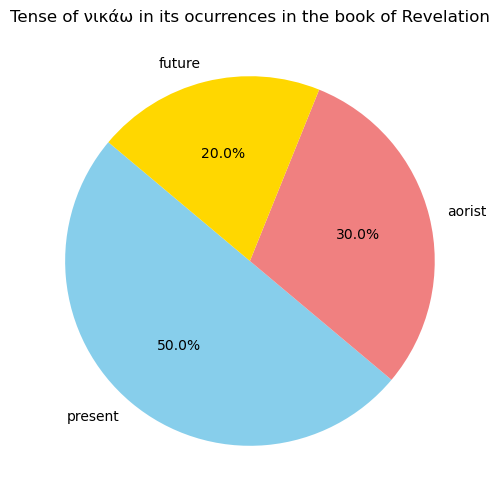

In [154]:
df = pd.DataFrame(NTresults['tense3']) # Creating Pandas DataFrame

book_counts = df["tense3"].value_counts() # Count occurrences per book

plt.figure(figsize=(6, 6))
plt.pie(book_counts, labels=book_counts.index, autopct='%1.1f%%', startangle=140, colors=["skyblue", "lightcoral", "gold"])
plt.title("Tense of νικάω in its ocurrences in the book of Revelation")
plt.show() # Plot pie chart